In [1]:
#importing packages 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import sqlalchemy as sa
from tabulate import tabulate
import seaborn as sns
%matplotlib inline

In [2]:
# displaying our team logo 
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "bomb.png", width=600)

In [3]:
#using Beautifulsoup to read the data
import urllib.request
from bs4 import BeautifulSoup as BS
request = urllib.request.Request('https://en.wikipedia.org/wiki/List_of_deadly_earthquakes_since_1900')
result = urllib.request.urlopen(request)
resulttext = result.read()

In [4]:
soup=BS(resulttext,'html.parser')
table=soup.find_all(class_='wikitable')[0]
df = pd.read_html(str(table),header=0)[0]
#df

In [5]:
#manually reading the data from html file
trs = table.find_all('tr')
#print(trs)
header = trs.pop(0)
ths = header.find_all('th')

headers = [x.text for x in ths]
data = []

for row in trs:
    tds = row.find_all('td')
    data.append([f.text for f in tds])
    
df1 = pd.DataFrame.from_records(data, columns=headers)
#df1

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 12 columns):
Origin (UTC)                                         1340 non-null object
Present-day country and link to Wikipedia article    1340 non-null object
Lat                                                  1326 non-null object
Long                                                 1326 non-null object
Depth (km)                                           1250 non-null object
Magnitude                                            1339 non-null object
Secondary Effects                                    373 non-null object
PDE Shaking Deaths                                   739 non-null float64
PDE Total Deaths                                     750 non-null float64
Utsu Total Deaths                                    1027 non-null float64
EM-DAT Total Deaths                                  560 non-null object
Other Source Deaths                                  37 non-null object
dtypes: 

In [7]:
df.describe()

,PDE Shaking Deaths,PDE Total Deaths,Utsu Total Deaths
count,739.000000,750.000000,1027.000000
mean,1504.351827,2016.632000,1580.013632
std,24573.002397,26859.406362,12620.035353
min,0.000000,0.000000,1.000000
25%,1.000000,1.000000,2.000000
50%,3.000000,4.000000,11.000000
75%,16.500000,24.000000,103.000000
max,655237.000000,655237.000000,242800.000000


In [8]:
df.head(n=15)

,Origin (UTC),Present-day country and link to Wikipedia article,Lat,Long,Depth (km),Magnitude,Secondary Effects,PDE Shaking Deaths,PDE Total Deaths,Utsu Total Deaths,EM-DAT Total Deaths,Other Source Deaths
0,1900-05-11 17:23,Japan,38.700,141.100,5,7.0 MJMA,NaN,NaN,NaN,NaN,NaN,NaN
1,1900-07-12 06:25,Turkey,40.300,43.100,NaN,5.9 Muk,NaN,NaN,NaN,140.0,NaN,NaN
2,1900-10-29 09:11,Venezuela,11.000,-66.000,0,7.7 Mw,NaN,NaN,NaN,NaN,NaN,NaN
3,1901-02-15 00:00,China,26.000,100.100,0,6.5 Ms,NaN,NaN,NaN,NaN,NaN,NaN
4,1901-03-31 07:11,Bulgaria,43.400,28.700,NaN,6.4 Muk,NaN,NaN,NaN,4.0,NaN,NaN
5,1901-08-09 09:23,Japan,40.500,142.500,35,7.2 Mw,T,NaN,NaN,NaN,NaN,NaN
6,1901-11-15 20:15,New Zealand (see 1901 Cheviot earthquake),-43.000,173.000,0,6.8 Ms,NaN,NaN,NaN,1.0,NaN,NaN
7,1902-01-30 14:01,Japan,40.500,141.300,35,6.9 Ms,NaN,NaN,NaN,1.0,NaN,NaN
8,1902-02-13 09:39,Azerbaijan,40.700,48.600,15,6.9 Muk,NaN,NaN,NaN,86.0,NaN,NaN
9,1902-03-09 07:46,Turkey,40.700,33.600,NaN,5.5 Muk,NaN,NaN,NaN,4.0,NaN,NaN


In [9]:
df[['Other Source Deaths','EM-DAT Total Deaths']].loc[1300:]

,Other Source Deaths,EM-DAT Total Deaths
1300,NaN,NaN
1301,NaN,NaN
1302,NaN,NaN
1303,NaN,NaN
1304,NaN,43
1305,NaN,NaN
1306,NaN,NaN
1307,NaN,3
1308,NaN,87476
1309,NaN,NaN


In [10]:
# patterns to remove the [] & other stuff - cleaning the columns
pattern=r'\(.*\)|\[.*\]|\D'
df['Other Source Deaths']=df['Other Source Deaths'].str.replace(pattern,"")
df['EM-DAT Total Deaths'] = df['EM-DAT Total Deaths'].str.replace(pattern, "")

In [11]:
#creating a pattern to clear the mag colmn
pattern = r'[^\.\d].*'
#list(df['Magnitude'].unique())
df['Magnitude'] = df['Magnitude'].str.replace(pattern,'')

In [12]:
#renaming column to country for easy access
df.rename(columns={'Present-day country and link to Wikipedia article':'Country'}, inplace=True)

In [13]:
#creating a pettern for country to remove the ()?(
country_pattern = r'(, ?| ?\().*'
df['Country'] = df['Country'].str.replace(country_pattern, "")

In [14]:
#converting the mag,em-dat& other source deaths column to numeric datatype
df['Magnitude'] = pd.to_numeric(df['Magnitude'])
df['EM-DAT Total Deaths']=pd.to_numeric(df['EM-DAT Total Deaths'])
df['Other Source Deaths']=pd.to_numeric(df['Other Source Deaths'])

In [15]:
#calculating the max of 4 colmns and placing it in a new columns - deaths
df["deaths"] = df[["PDE Total Deaths","Utsu Total Deaths","EM-DAT Total Deaths","Other Source Deaths"]].max(axis=1)

In [16]:
#creating new columns year,month - extracting from UTC column & converting to datetime datatype  
df["Origin (UTC)"] = pd.to_datetime(df["Origin (UTC)"])
df["Year"] = df['Origin (UTC)'].dt.year
df["Month"] = df['Origin (UTC)'].dt.month

In [17]:
# removing the ? from lat,long and depths column , replacing with nan value
lat_long_pattern = r'\?'
df['Lat'] = df['Lat'].replace(lat_long_pattern,np.nan,regex=True)
df['Long']= df['Long'].replace(lat_long_pattern,np.nan,regex=True)
df['Depth (km)']= df['Depth (km)'].replace(lat_long_pattern,np.nan,regex=True)

In [18]:
#converting the lat,long,depth & year colm to numeric 
df['Lat']=pd.to_numeric(df['Lat'])
df['Long']=pd.to_numeric(df['Long'])
df['Depth (km)']=pd.to_numeric(df['Depth (km)'])
df['Year'] = pd.to_numeric(df['Year'])

In [19]:
#creating a df where the  deaths where max 
df['deaths'].nlargest(5)
df_max_deaths = df.loc[df['deaths'].isin([655237.0,297200.0,235502.0,222517.0,200000.0])]


In [20]:
#creating a df where the mag was max
df['Magnitude'].nlargest(5)
df_max_magnitude=df.loc[df['Magnitude'].isin([9.0,9.1,9.2,9.5])]

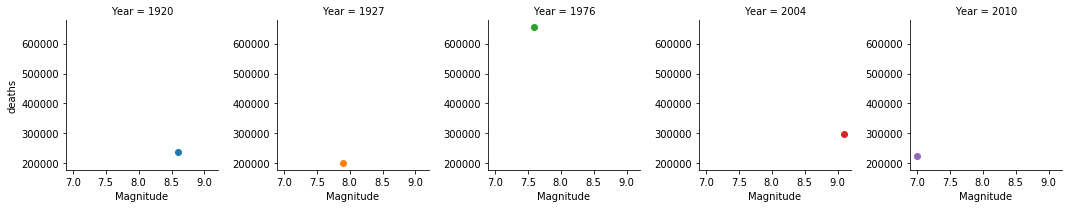

In [21]:
#plotting for max deaths 
map_max_deaths = sns.FacetGrid(df_max_deaths,col="Year",hue="Year")
map_max_deaths.map(plt.plot,"Magnitude","deaths",marker="o")
plt.show()

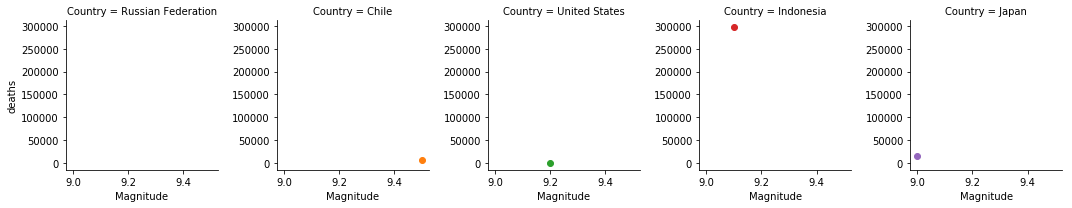

In [22]:
map_max_magnitude = sns.FacetGrid(df_max_magnitude,col="Country",hue="Year")
map_max_magnitude.map(plt.plot,"Magnitude","deaths",marker="o");

In [23]:
#calculating the min,max of magnitude
minimum = df["Magnitude"].min()
maximum = df["Magnitude"].max()
average = df["Magnitude"].mean()

print("Minimum:", minimum)
print("Maximum:",maximum)
print("Mean",average)


Minimum: 2.0
Maximum: 9.5
Mean 6.397087378640776


C:\Users\Suhasini\Anaconda3\lib\site-packages\numpy\lib\function_base.py:748: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= mn)
C:\Users\Suhasini\Anaconda3\lib\site-packages\numpy\lib\function_base.py:749: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= mx)


,Range of Magnitude,Frequency,Percentage
0,2.0-3.0,9.0,0.6716
1,3.0-4.0,6.0,0.4478
2,4.0-5.0,63.0,4.7015
3,5.0-6.0,357.0,26.6418
4,6.0-7.0,511.0,38.1343
5,7.0-8.0,342.0,25.5224
6,8.0-9.0,46.0,3.4328
7,9.0-10.0,5.0,0.3731


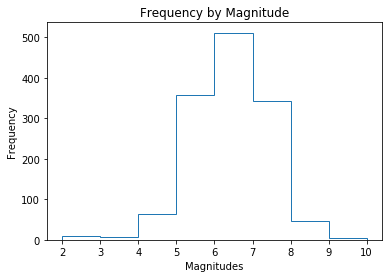

In [24]:
#calculating the frequency of earthquakes upon the mag 
total = len(df)
n, bins, patch = plt.hist(df["Magnitude"], histtype = 'step', range=(2.0,10.0), bins = 8)
plt.xlabel("Magnitudes")
plt.ylabel("Frequency")
plt.title("Frequency by Magnitude")
histo = pd.DataFrame()
for i in range(0, len(n)):
    mag = str(bins[i])+ "-"+str(bins[i+1])
    freq = n[i]
    percentage = round((n[i]/total) * 100, 4)
    histo = histo.append(pd.Series([mag, freq, percentage]), ignore_index=True)
    
histo.columns = ['Range of Magnitude', 'Frequency', 'Percentage']
histo

It seems that apprx. 38% of earthquakes had a magnitude between 6.0 to 7.0 whereas less that 4% scores between 8.0 and 9.5 on the Richter scale.


An interesting patterns also occurs when we plot magnitudes vs frequency on a log scale


C:\Users\Suhasini\Anaconda3\lib\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


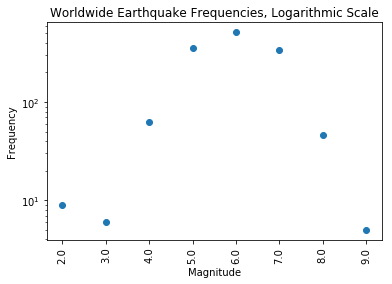

In [25]:
fig, ax = plt.subplots()
#ax.plot(histo.index, fit[0] * histo.index + fit[1], color='red')
ax.scatter(histo.index, histo['Frequency'])
plt.xticks(histo.index, bins, rotation='vertical')
plt.yscale('log')

plt.xlabel("Magnitude")
plt.ylabel("Frequency")
plt.title("Worldwide Earthquake Frequencies, Logarithmic Scale")
fig.show()

This pattern is known as a power-law distribution: it turns out that for every increase of one point in magnitude, an earthquake becomes about ten times less frequent. So, for example, magnitude 6.5 earthquakes occur ten times more frequently than magnitude 7's, and one hundred times more often than magnitude 8's.

In [26]:
#q=df[(df['Magnitude'] >= 6.0) & (df['Magnitude'] <=7.0)].groupby(df['Country'])
freqbycountry = df.groupby('Country').size()
print(freqbycountry)

Country
                                          1
Afghanistan                              30
Albania                                   7
Algeria                                  21
Argentina                                11
Armenia                                   2
Australia                                 3
Azerbaijan                                5
Bangladesh                                7
Belgium                                   1
Bolivia                                   3
Bosnia and Herzegovina                    3
Brazil                                    1
Bulgaria                                  5
Burma                                    11
Burundi                                   1
Canada                                    3
Chile                                    44
China                                   166
Colombia                                 24
Costa Rica                               10
Cuba                                      2
Cyprus                  

In [27]:
print(q)

NameError: name 'q' is not defined

We can use this to relatively calculate the probability that an earthquake will hit a particular region, although it is impossible to know exactly when. For example, if we know that there were 15 earthquakes between 5.0 and 5.9 in a particular region in a period of 70 years, that works to about one earthquake in three years. Following this distribution above, we can "predict" that an earthquake measuring between 6.0 and 6.9 should occur about once every thirty years in this region.

In [ ]:
#correlation btw depth and magnitude of earthquake
shallow = len(df[df['Depth (km)'] < 70])#18660
print(shallow)
intermediate = len(df[(df['Depth (km)'] > 70) & (df['Depth (km)'] < 300)]) ##3390
print(intermediate)
deep = len(df[df['Depth (km)'] > 300]) #1326
print(deep)
print(total)
print(str(round(shallow/float(total) * 100, 2)) + " % of earthquakes are shallow.") 
print(str(round(intermediate/float(total) * 100, 2)) + " % of earthquakes are intermediate.")
print(str(round(deep/float(total) * 100, 2)) + " % of earthquakes are deep.")

In [ ]:
#reading the gpd file into world 
import geopandas as gpd
import matplotlib.pyplot as plt
from geopandas import GeoSeries, GeoDataFrame
from shapely.geometry import Point
%matplotlib inline
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [ ]:
#converting df into geodf ,initialize crs, & convert lat lon columns into geometry points
crs = {'init': 'epsg:4326'}
geometry_pts = [Point(xy) for xy in zip(df.Long,df.Lat)]
gdf = GeoDataFrame(df, crs=crs, geometry=geometry_pts)
print(gdf.head(n=5))

In [ ]:
#plotting the base world map and drafting the df points on the base map 
ax = world.plot(color='green', edgecolor='white', figsize=(15,85))
#.axis('off')
gdf.plot(ax=ax, marker='.', color='red', markersize=12);


In [ ]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
import os
from mpl_toolkits.basemap import Basemap, shiftgrid, cm

In [ ]:
map = Basemap(lat_0=45,lon_0=-100,resolution='l')
plt.figure(figsize=(20,10))
map.drawcoastlines()
map.drawcountries()
map.fillcontinents(color = 'pink')
map.drawmapboundary()
longs = df["Long"]
lats= df["Lat"]
x,y=map(longs,lats)
map.plot(x, y, 'bo', markersize=1)
plt.show()

In [ ]:
#implementing widgets into geodf
from ipywidgets import *
from traitlets import dlink

In [ ]:
#adding colorbar to the basemap & widgets
countries = sorted(list(set(gdf.Country)))
countries.insert(0, 'ALL')
countries.remove("")

#placing a slider and dropdown widget 
w = widgets.FloatRangeSlider(value=(0,10),min=0,max=10, continuous_update=False, description='Magnitude')
m = widgets.Dropdown(options=countries, value='ALL', description='Country', disabled=False,)
z = widgets.HBox([w,m])
display(z)

#plotting the gdf on world map 
ax = world.plot(color='#cfd1d3', edgecolor='black', figsize=(25,55))
ax.axis('off')
gdf.plot(ax=ax, column='Magnitude', alpha=0.4, cmap='seismic', );
fig = ax.get_figure()

from mpl_toolkits.axes_grid1 import make_axes_locatable # importing for colorbar placement
from IPython.display import display, clear_output
import warnings


divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='3%', pad=0.01)

#placing the colorbar on the basemap
sm = plt.cm.ScalarMappable(cmap='seismic', norm=plt.Normalize(vmin=2.0, vmax=10.0))
sm._A = []
fig.colorbar(sm,cax=cax)
fig.patch.set_facecolor('#e4f4ff')

maximum = 10
minimum = 0
country = "ALL"
world_copy = world.copy()

#writing a fn which is called when there is a change selected in slider- magnitude
def response(change):
    try:
        clear_output(wait=True)
        global country
        global maximum
        global minimum
        global world_copy
        if len(change['new']) == 2:
            maximum = change['new'][1]
            minimum = change['new'][0]
        else:
            country = change['new']
        display(z)

        if country.upper() == 'ALL':
            display_df = gdf[(gdf["Magnitude"] >= minimum) & (gdf['Magnitude'] <= maximum)]
            world_copy = world
        else:
            display_df = gdf[(gdf["Magnitude"] >= minimum) & (gdf['Magnitude'] <= maximum) & (gdf['Country'].str.upper() == country.upper())]
            world_copy = world[world['name'].str.upper() == country.upper()]

        #display_df = gdf[(gdf["Magnitude"] >= minimum) & (gdf['Magnitude'] <= maximum)]


        ax = world_copy.plot(color='#cfd1d3', edgecolor='black',figsize=(25,55))
        ax.axis('off')
        display_df.plot(ax=ax, column='Magnitude', alpha=0.4, cmap='seismic', );
        fig = ax.get_figure()

        divider = make_axes_locatable(ax)
        cax = divider.append_axes('right', size='3%', pad=0.01)

        sm = plt.cm.ScalarMappable(cmap='seismic', norm=plt.Normalize(vmin=2.0, vmax=10.0))
        sm._A = []
        fig.colorbar(sm,cax=cax)
        fig.patch.set_facecolor('#e4f4ff')
    except:
        print("Ain't no earthquakes of this magnitude in this country... Try again")
        warnings.filterwarnings('ignore')

    
w.observe(response, names='value')
m.observe(response, names='value')

In [ ]:
# scatter plot for size by magnitude (bubble)
from mpl_toolkits.axes_grid1 import make_axes_locatable #imported for colorbar placement
#import traitlets
import warnings

## repeated below to re-display graph ##
ax = world.plot(color='black', edgecolor='white', figsize=(25,55))
ax.axis('off')
plt.scatter(x=gdf['Long'], y=gdf['Lat'], s=gdf['Magnitude']*10, alpha=0.3, c='red');
fig = ax.get_figure()
fig.patch.set_facecolor('#e4f4ff')
## repeated below to re-display graph ##

country = 'ALL'
minimum = 2.0
maximum = 9.5
world_copy = world.copy()

m = widgets.FloatRangeSlider(
    value=(0, 15),
    min=gdf['Magnitude'].min(),
    max=gdf['Magnitude'].max(),
    description='Magnitude',
    continuous_update=False,
)

countries = sorted(list(set(gdf.Country)))
countries.insert(0, 'ALL')
countries.remove("")

d = widgets.Dropdown(
    options=countries,
    value='ALL',
    description='Country',
    disabled=False,
)
z = widgets.HBox([m,d])
display(z)

def response(change):
    try:
        clear_output(wait=True)
        global country
        global maximum
        global minimum
        global world_copy
        if len(change['new']) == 2:
            maximum = change['new'][1]
            minimum = change['new'][0]
        else:
            country = change['new']
        display(z)
        if country.upper() == 'ALL':
            display_df = gdf[(gdf["Magnitude"] >= minimum) & (gdf['Magnitude'] <= maximum)]
            world_copy = world
        else:
            display_df =gdf[(gdf["Magnitude"] >= minimum) & (gdf['Magnitude'] <= maximum) & (gdf['Country'].str.upper() == country.upper())]
            world_copy = world[world['name'].str.upper() == country.upper()]

        ax = world_copy.plot(color='black', edgecolor='white', figsize=(25,55))
        ax.axis('off')
        
       
        N = display_df.Country.count()
        x = display_df['Long']
        y = display_df['Lat']
        colors = np.random.rand(N)
        area =np.pi *(15 * np.random.rand(N)) ** 2
        #np.pi * (15 * np.random.rand(N))**2
        
        plt.scatter(x , y , s= area, c=colors,alpha=0.85);
        
        #plt.scatter(x=display_df['Long'], y=display_df['Lat'], s=display_df['Magnitude']*10, alpha=0.5, c='red');
        plt.show()
        #print(display_df)
        fig = ax.get_figure()
        fig.patch.set_facecolor('#e4f4ff')
    except:
        print("Ain't no earthquakes of this magnitude in this country... Try again")
        warnings.filterwarnings('ignore')


m.observe(response, names='value')
d.observe(response, names='value')

In [ ]:
#years[-1] chooses most recent year for display
d = widgets.Dropdown(
    options=years,
    value=years[-1],  # using -1 defaults to the most recent year of unique years list
    description='Year',
    disabled=False,
)
display(d)

def plot_y(y_change):
    clear_output()
    year = y_change['new']
    plot_year_death = df.copy() 
    plot_year_death = plot_year_death.loc[plot_year_death['Year']==year] #new df with year selected
    display(d)
    plt.title('Deaths by country sized by magnitude for ' + str(year)) #display year selection in title
    plt.xticks(rotation='vertical')
    #plt.scatter(x=display_df['Long'], y=display_df['Lat'], s=display_df['Magnitude']*10, alpha=0.5, c='red');
    plt.scatter(plot_year_death['Country'], plot_year_death['deaths'], marker='*', alpha=0.3, s=plot_year_death['Magnitude']**3)
    #plt.hist(plot_year_death['Country'])
d.observe(plot_y, names='value')
#2004,2000,

In 2004 ,Indonesia & Taiwan were the worst hit & tsunami was another reason for causing more deaths

In 1960, Indonesia faced an earthquake with mag of 9 and above ..

In [ ]:
#plotting graphs for various countries, based on year and deaths
#fig, ax = plt.subplots()
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3, sharex=True, sharey=True, figsize=(10,5))
df[df['Country'] == 'China'].plot(x='Year', y='deaths', ax=ax1,label='China');
df[df['Country']=='Japan'].plot(x='Year' , y='deaths',ax=ax2,label='Japan');
df[df['Country'] == 'United States'].plot(x='Year',y='deaths',ax=ax3,label='US')

df[df['Country'] == 'Indonesia'].plot(x='Year', y='deaths', ax=ax4,label='Indonesia');
df[df['Country']=='Chile'].plot(x='Year' , y='deaths',ax=ax5,label='Chile');
df[df['Country']=='Taiwan'].plot(x='Year',y='deaths',ax=ax6,label='Taiwan');

plt.tight_layout()

In [ ]:
#creating plots based on year ,mag for a country 
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3, sharex=True, sharey=True, figsize=(10,5))
df[df['Country'] == 'China'].plot(x='Year', y='Magnitude', ax=ax1,label='China');
df[df['Country']=='Japan'].plot(x='Year' , y='Magnitude',ax=ax2,label='Japan');
df[df['Country'] == 'United States'].plot(x='Year',y='Magnitude',ax=ax3,label='US')

df[df['Country'] == 'Indonesia'].plot(x='Year', y='Magnitude', ax=ax4,label='Indonesia');
df[df['Country']=='Chile'].plot(x='Year' , y='Magnitude',ax=ax5,label='Chile');
df[df['Country']=='India'].plot(x='Year',y='Magnitude',ax=ax6,label='India');

plt.tight_layout()

In [ ]:
#import to create an interactive map - ipyleaflet
from ipyleaflet import *

Folium builds on the data wrangling strengths of the Python ecosystem and the mapping strengths of the Leaflet.js library. Manipulate your data in Python, then visualize it in on a Leaflet map via folium.

In [ ]:
import folium
new_map = folium.Map(location=[43.1,40.3], zoom_start=2)

#placing markers on the map 
for row in gdf.iterrows():
    row = list(row[1])
    try:
        folium.Marker([row[2],row[3]], popup=str(row[1]) + ' | ' + str(row[0]) + ' | ' + str(row[5])).add_to(new_map)
    except:
        continue
   
new_map